# **Análisis del Precio de Airbnb**

##**Indice**

###*Estudio del precio de los alojamientos en Airbnb*

### 1. **Introducción**

1.1 **Resumen**

1.2 **Descripción del Dataset**

1.3 **Contexto Comercial**

1.4 **Problema Comercial**

1.5 **Contexto Analítico**

###2. **Definición del objetivo**

2.1 **Objetivo**

2.2 **Motivacion**

2.3 **Hipotesis**

###3. **Data Acquisition**

3.1 **Importar librerias**

3.2 **Data Wrangling**

###4. **Analisis exploratorio de datos**

4.1 **Análisis de variables**

4.1.1 Análisis univariado

4.1.2 Análisis bivariado

4.2 **Recomendaciones basadas en las visualizaciones**

###5. **Ingeniería de atributos**

5.1 **Encoding**

5.2 **Correlacion**

5.3 **Normalización de variables**

###6. **Entrenamiento**

6.1 **variables x_1 / y_1**

6.2 **variables x_2 / y_2**

###7. **Evaluación de modelos**

7.1 **variables x_1 / y_1**

7.2 **variables x_2 / y_2**

7.3 **Comparacion entre variables x_1 / y_1 y variables x_2 / y_2**

7.3.1 Comparación MSE de modelos de regresión

7.3.2 Comparación RMSE de modelos de regresión

7.3.3 Comparación R2 de modelos de regresión

###8. **Conclusiones**

8.1 **Selección del mejor modelo**

### **Anexo 1 utilizacion de Api**

*   **URL de la api sin clave**
*   **URL de la api con clave**





##**1. Introduccion**


1.1 **Resumen**

El presente estudio tiene como objetivo analizar el precio de los alojamientos en Airbnb en función de sus características. Para ello, se utilizará un conjunto de datos con información sobre diversos aspectos.

1.2 **Descripción del Dataset**

Se utilizara el dataset de Airbnb, empresa digital que se dedica a la oferta de alojamientos.
El dataset cuenta con un ID de cada alojamiento, nombre del lugar, zona de alquiler, politica de cancelacion, precio, verificacion del host, etc.

1.3 **Contexto Comercial**

El mercado de alquileres vacacionales es altamente competitivo.
Los propietarios de alojamientos deben diferenciarse de la competencia para atraer a los huéspedes.
Los huéspedes buscan alojamientos que sean cómodos, asequibles y bien ubicados.

1.4 **Problema Comercial**

El alojamiento no está generando suficientes ingresos.
La tasa de ocupación es baja.
Los huéspedes no están satisfechos con el alojamiento.

1.5 **Contexto Analítico**

Se dispone de un conjunto de datos que contiene información sobre el alojamiento, como precio, ubicación, características, reseñas de los huéspedes, etc.
Se pueden utilizar técnicas de análisis de datos para identificar los factores que influyen en la decisión de los huéspedes de reservar un alojamiento.

##**2. Definición del objetivo**

2.1 **Objetivo**

Regresión: predecir el precio de una vivienda en AirBNB en función de sus características.

2.2 **Motivacion**

El análisis del precio de Airbnb presenta un gran potencial para:

Comprender los factores que determinan el precio de los alojamientos.
Ayudar a los propietarios a establecer un precio competitivo para sus propiedades.
Permitir a los huéspedes encontrar alojamientos que se ajusten a su presupuesto.

2.3 **Hipotesis**

¿El tipo de habitación tiene un impacto en el precio?
¿La ciudad donde se encuentra un alojamiento influye en su precio?
¿Existe una correlación entre el precio de un alojamiento y la cantidad de reseñas que tiene?

Se espera que el modelo de regresión sea capaz de predecir el precio de los alojamientos en Airbnb con un alto grado de precisión.




##**3. Data Acquisition**


###3.1 **Importar librerias**

In [1]:
#librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder,StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, r2_score, confusion_matrix, mean_squared_error,accuracy_score,f1_score,silhouette_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
#ruta
ruta = 'Airbnb_Open_Data.csv' #content/Airbnb_Open_Data.csv
df_airbnb = pd.read_csv(ruta)
df_airbnb.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
#tamaño del dataset
df_airbnb.shape

(102599, 26)

In [4]:
#columnas
df_airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
#informacion del dataset
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

###3.2 **Data Wrangling**

In [6]:
#Valores de vecindario
df_airbnb['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


In [7]:
#modifico datos mal cargados (brookln y manhatan mal cargado)
df_airbnb['neighbourhood group'] = df_airbnb['neighbourhood group'].str.replace('brookln', 'Brooklyn').str.replace('manhatan', 'Manhattan').str.strip()
#Valores de vecindario
df_airbnb['neighbourhood group'].value_counts()

,count
neighbourhood group,
Manhattan,43793
Brooklyn,41843
Queens,13267
Bronx,2712
Staten Island,955


In [8]:
#Elimino signos
df_airbnb['price'] = df_airbnb['price'].str.replace('$', '').str.replace(',', '').str.strip()

In [9]:
#verifico si hay vacios
df_airbnb.isnull().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


<Axes: >

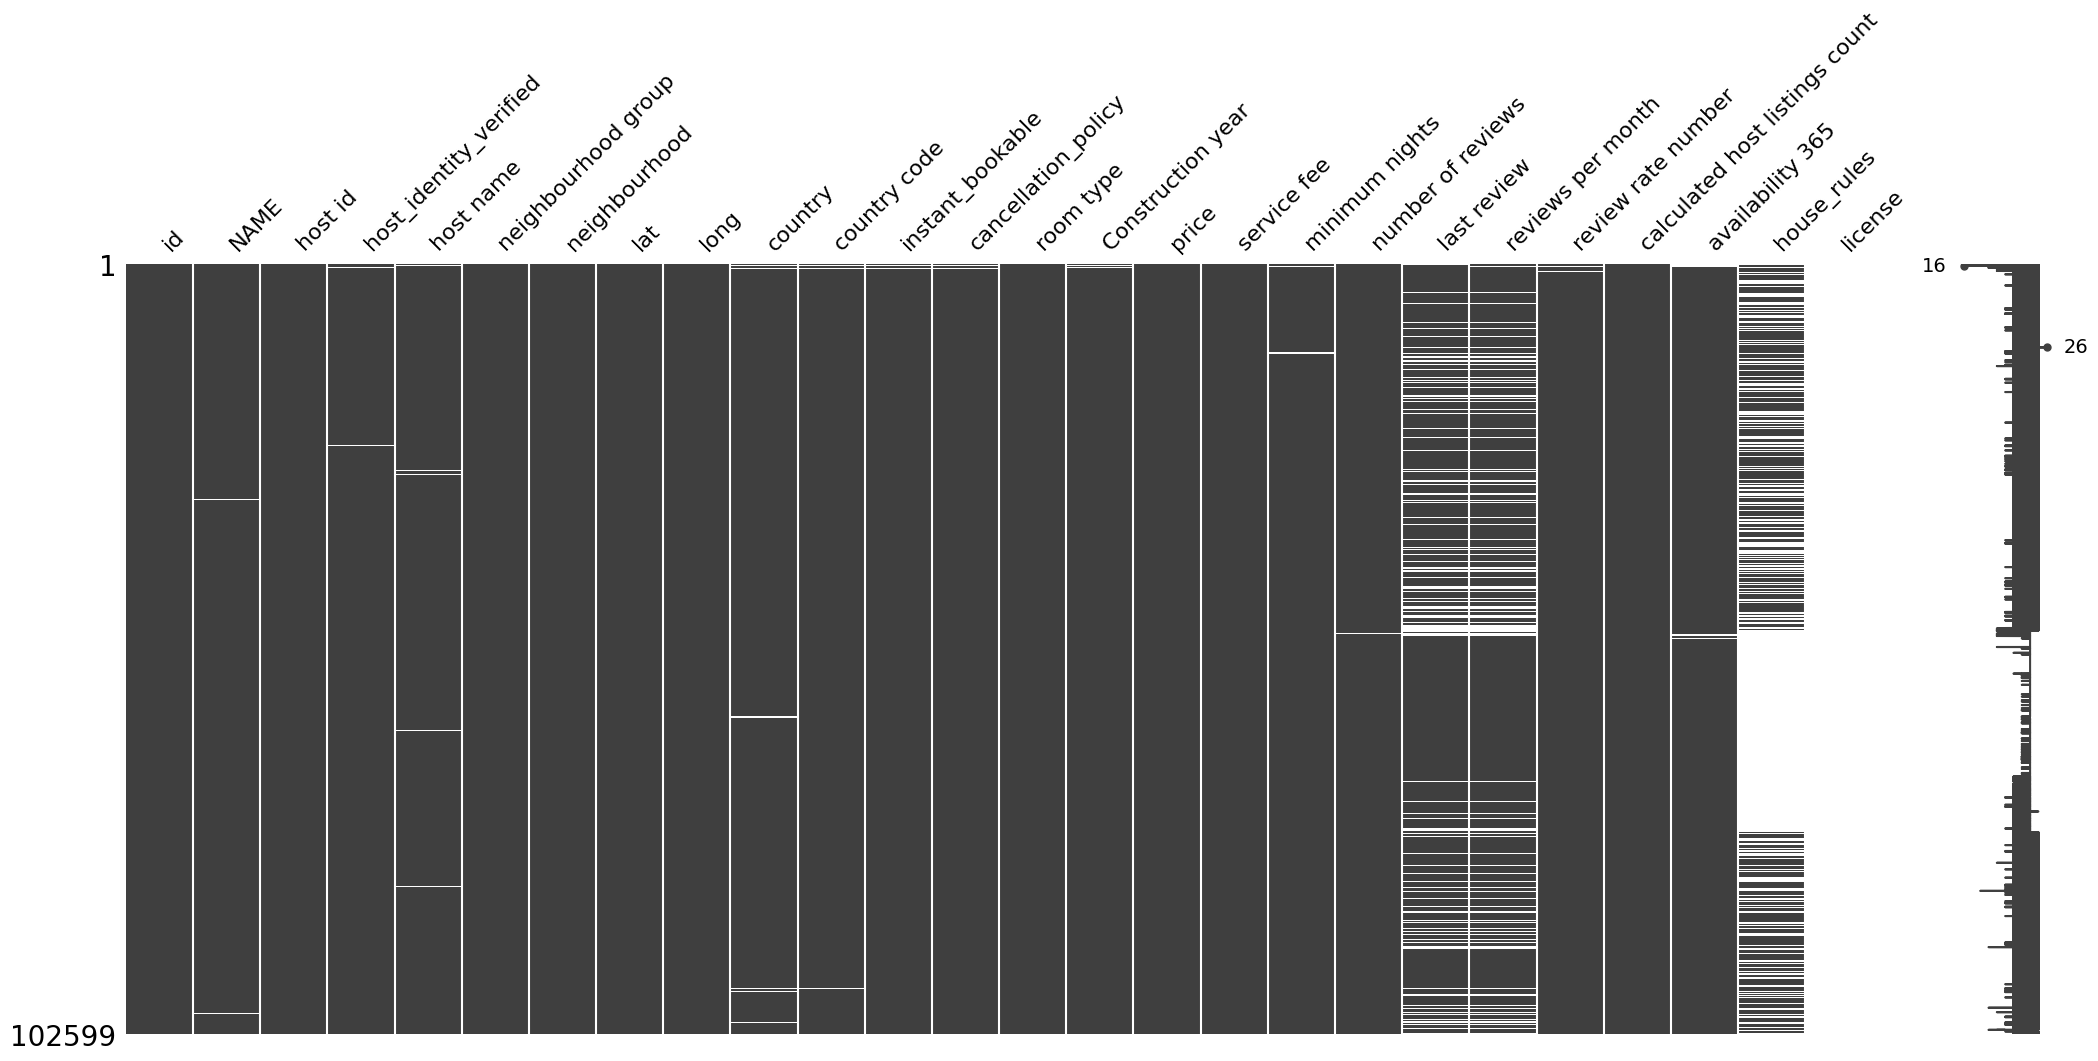

In [10]:
#Genero una visualización
msno.matrix(df_airbnb)

In [11]:
#Elimino columnas que no uso
df_airbnb.drop(['NAME','host id','host_identity_verified','host name','last review',
                'reviews per month','house_rules','license'], axis=1, inplace=True)

In [12]:
#Elimino los NAN
df_airbnb = df_airbnb.dropna(subset=['neighbourhood group','neighbourhood','lat','long','country','country code','instant_bookable',
                                     'cancellation_policy',
                                     'room type','Construction year','price','service fee','minimum nights',
                                     'number of reviews','review rate number',
                                     'calculated host listings count','availability 365'])

In [13]:
#transformo a int
df_airbnb['Construction year'] = df_airbnb['Construction year'].astype(int)
df_airbnb['price'] = df_airbnb['price'].astype(int)
df_airbnb['minimum nights'] = df_airbnb['minimum nights'].astype(int)
df_airbnb['number of reviews'] = df_airbnb['number of reviews'].astype(int)
df_airbnb['review rate number'] = df_airbnb['review rate number'].astype(int)
df_airbnb['calculated host listings count'] = df_airbnb['calculated host listings count'].astype(int)
df_airbnb['availability 365'] = df_airbnb['availability 365'].astype(int)

In [14]:
df_airbnb.isnull().sum()

,0
id,0
neighbourhood group,0
neighbourhood,0
lat,0
long,0
country,0
country code,0
instant_bookable,0
cancellation_policy,0
room type,0


<Axes: >

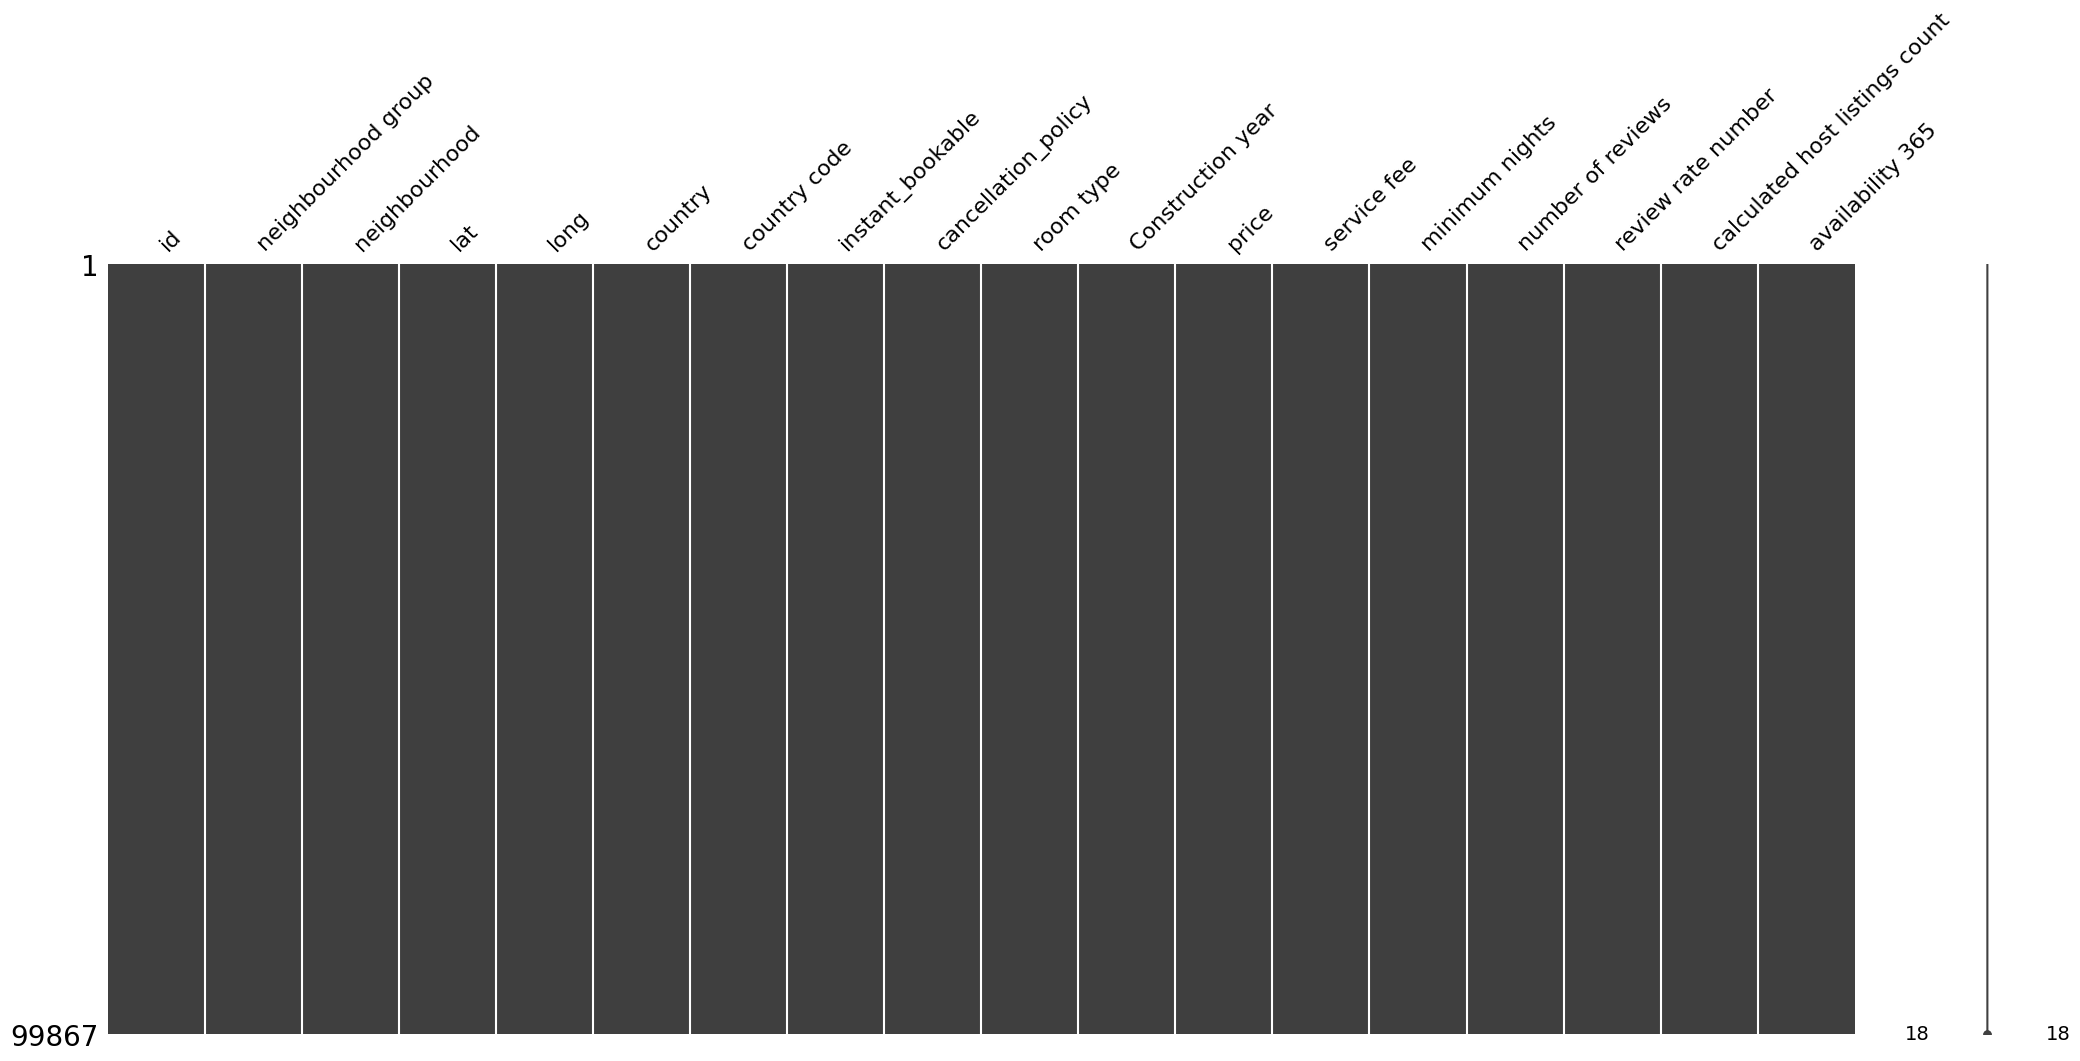

In [15]:
#Genero una visualización
msno.matrix(df_airbnb)

In [16]:
#tamaño del dataset
df_airbnb.shape

(99867, 18)

##**4. Analisis exploratorio de datos**

In [29]:
#para ver estilos disponibles
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [30]:
#para cambiar el estilo de Matplotlib
mpl.style.use('tableau-colorblind10')

###4.1 **Análisis de variables**



Variables categóricas: Podemos analizar la distribución de estas categorías y ver si hay alguna dominante. "neighbourhood group", "room type".

Variables numéricas:Podemos calcular medidas de resumen como media, mediana, desviación estándar para entender la distribución de los precios.

####4.1.1 **Análisis univariado**

**Distribución de precios**

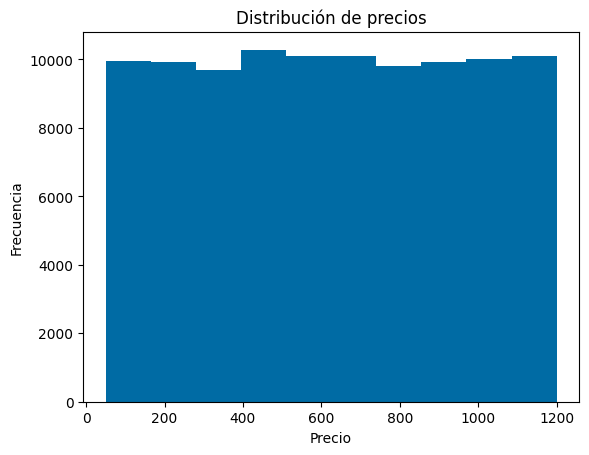

In [31]:
plt.hist(df_airbnb["price"])
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

**Uniforme**

El gráfico muestra la distribución de precios de los listados en Airbnb, el resultado indica que no hay una variación significativa en la frecuencia de los valores dentro del rango de datos analizado. En otras palabras, todos los valores dentro del rango tienen una probabilidad similar de ocurrir.El precio medio de los alojamientos no se puede determinar con precisión solo con el histograma.

**Buscaremos las zonas de ofertas de alquileres.**

In [32]:
vecindarios = df_airbnb[['neighbourhood group', 'id']].groupby(by='neighbourhood group').count()

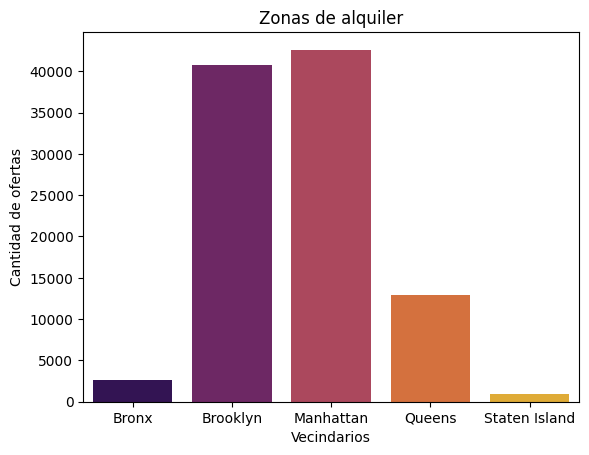

In [33]:
vc = sns.barplot(x=vecindarios.index, y=vecindarios.id, width=0.8, hue=vecindarios.index, palette="inferno")
vc.set(xlabel='Vecindarios', ylabel='Cantidad de ofertas', title='Zonas de alquiler')
plt.show()

El gráfico muestra el número de ofertas de alquiler en cinco zonas de la ciudad de Nueva York: Bronx, Brooklyn, Manhattan, Queens y Staten Island. El eje horizontal del gráfico muestra las zonas de alquiler, y el eje vertical muestra el número de ofertas de alquiler.
Se aprecia que en Manhatthan y Brooklyn son la zonas de mas ofertas seguido por Queens.

**En esta etapa buscaremos los diferentes tipos de habitaciones**

In [34]:
tipo_de_habitacion = df_airbnb[['room type', 'id']].groupby(by='room type').count()

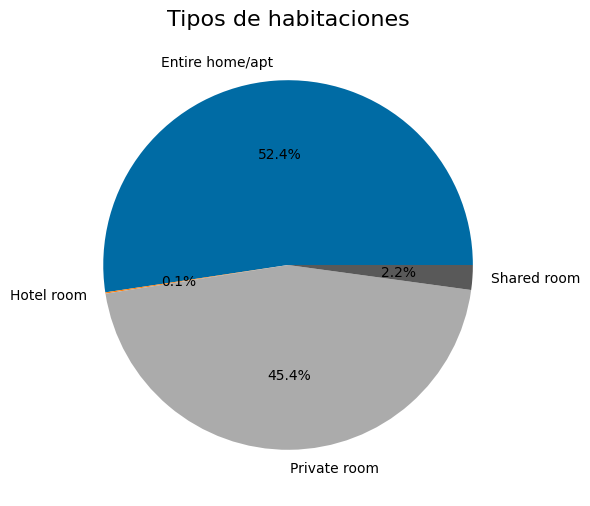

In [35]:
plt.figure(figsize=(6,6))
plt.pie(tipo_de_habitacion.id, labels = tipo_de_habitacion.index,autopct='%1.1f%%')
plt.title('Tipos de habitaciones', fontsize=16)
plt.show()

El gráfico muestra la distribución de diferentes tipos de habitaciones.La mayoría de las habitaciones en la plataforma de alojamiento son habitaciones privadas o habitaciones enteras/apartamentos. Esto sugiere que la plataforma es más popular entre los viajeros que buscan un alojamiento privado e independiente


####4.1.2 **Análisis bivariado**

**Precio por tipo de habitación**

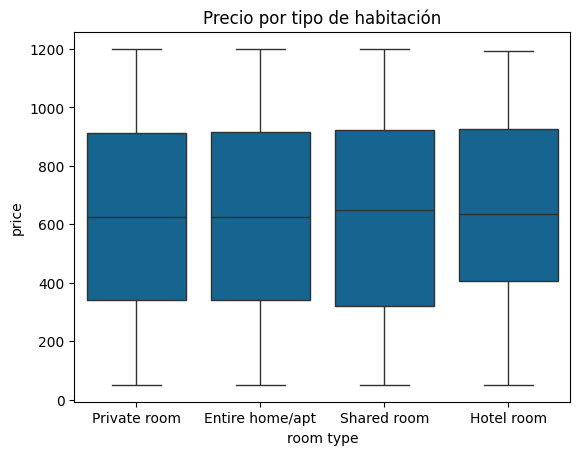

In [36]:
sns.boxplot(x="room type", y="price", data=df_airbnb)
plt.title("Precio por tipo de habitación")
plt.show()

La distribución del precio es relativamente amplia, lo que indica que existe una gran variabilidad en los precios de las habitaciones.
Las habitaciones privadas tienen un precio promedio más alto que las habitaciones compartidas.
Las habitaciones enteras/apartamentos tienen el precio promedio más alto de todos los tipos.

**Precio por vecindario y tipo de habitacion**

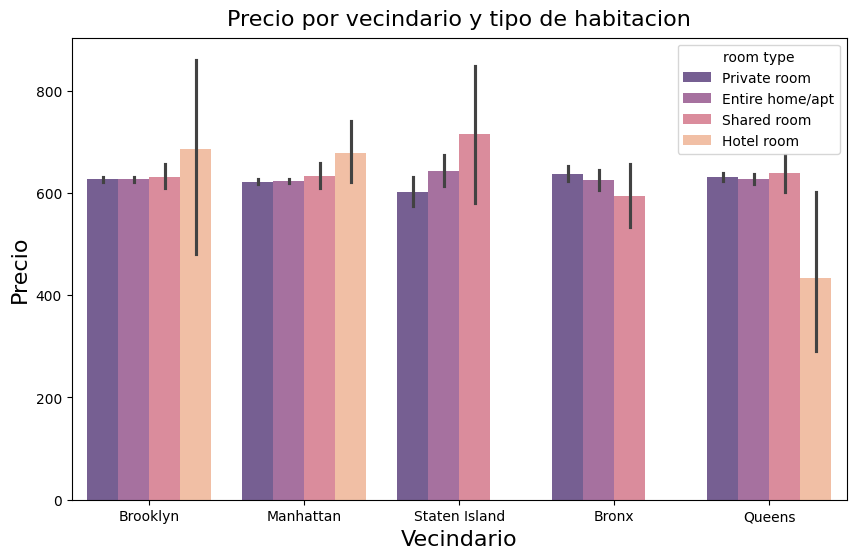

In [37]:
plt.figure(figsize=(10, 6))
precio_vecindario = sns.barplot(data=df_airbnb, y="price", x='neighbourhood group', hue ="room type", palette="magma",alpha=0.7)
plt.title("Precio por vecindario y tipo de habitacion",fontsize=16, verticalalignment='bottom' )
plt.xlabel("Vecindario", fontsize=16)
plt.ylabel("Precio", fontsize=16)
plt.show();

El grafico muestra los rangos de precio por tipo de habitacion en diferentes zonas de alquiler.A simple vista vemos que en Staten Island y Bronx no hay Hotel room

**Precio por vecindario**

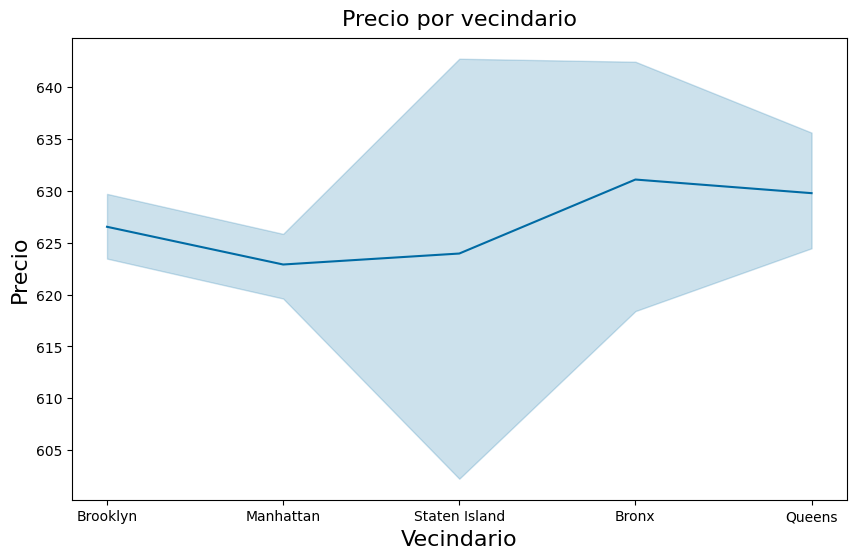

In [38]:
plt.figure(figsize=(10,6))
precio_por_vecindario = sns.lineplot(data=df_airbnb, y="price", x='neighbourhood group')
plt.title("Precio por vecindario",fontsize=16, verticalalignment='bottom' )
plt.xlabel("Vecindario", fontsize=16)
plt.ylabel("Precio", fontsize=16)
plt.show()

El gráfico muestra que el precio promedio de un alquiler varía significativamente entre los vecindarios de la ciudad de Nueva York. En Manhattan pueden esperar pagar el precio más alto, mientras que en Staten Island pueden encontrar los precios más baratas.


**Ubicaciones de los anuncios de Airbnb**

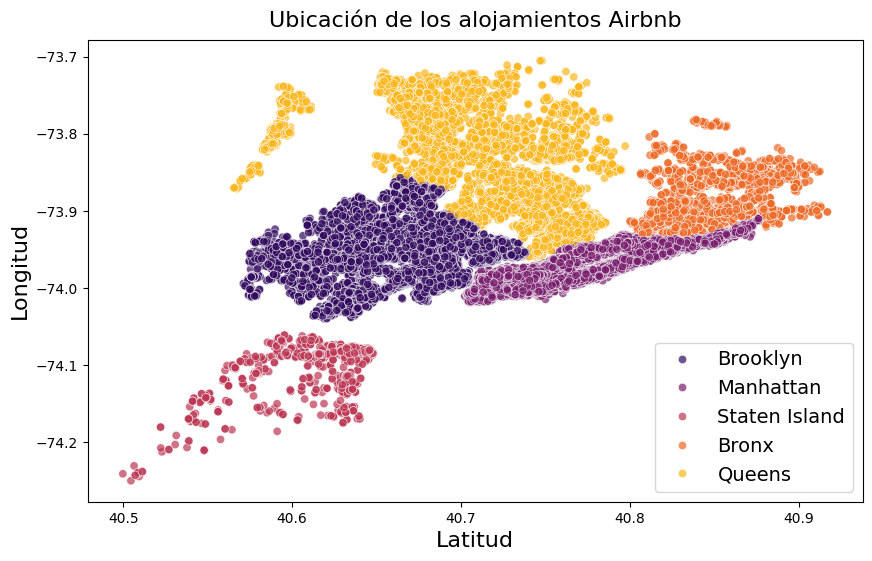

In [39]:
plt.figure(figsize=(10,6))
ubicaciones = sns.scatterplot(data=df_airbnb, y="long", x='lat', hue ="neighbourhood group",palette="inferno", alpha=0.7)
plt.title("Ubicación de los alojamientos Airbnb",fontsize=16, verticalalignment='bottom' )
plt.xlabel("Latitud", fontsize=16)
plt.ylabel("Longitud", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.show()

Este diagrama de dispersión muestra las ubicaciones de los anuncios de Airbnb según su latitud y longitud. Cada punto de datos representa un anuncio de Airbnb y el color del punto corresponde a su grupo de vecinos.

Existe una concentración significativa de anuncios en Manhattan, Brooklyn y Queens.
Staten Island tiene la menor cantidad de anuncios.
La distribución de anuncios no es uniforme a lo largo de la ciudad  y parece estar más influenciada por factores socioeconómicos, como la accesibilidad, la demanda turística y las características del vecindario.

**Relación entre precio y número de reseñas**

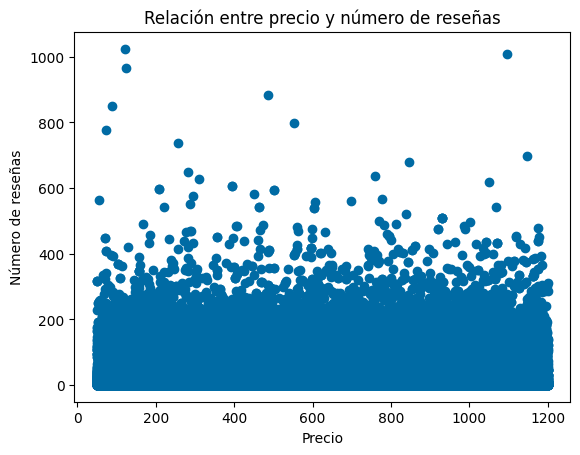

In [40]:
plt.scatter(df_airbnb["price"], df_airbnb["number of reviews"])
plt.title("Relación entre precio y número de reseñas")
plt.xlabel("Precio")
plt.ylabel("Número de reseñas")
plt.show()

Se observa una dispersión considerable en los datos, lo que indica que la relación entre precio y número de reseñas no es totalmente determinística.
Existen anuncios con precios altos y pocas reseñas, y viceversa.

###4.2 **Recomendaciones basadas en las visualizaciones**




1. Precio:

Establecer un precio competitivo: El precio debe ser acorde con el mercado y las características del alojamiento.

Destacar las características del alojamiento que lo hacen único o valioso, como una ubicación céntrica, una vista espectacular o un diseño moderno, es importante destacarlas en la descripción del anuncio para justificar un precio más alto.

2. Ubicación:

La ubicación es uno de los factores más importantes que los huéspedes consideran al elegir un alojamiento. Destacar la ubicación del alojamiento en la descripción del anuncio y mencionar las atracciones, restaurantes y servicios cercanos. Ofrecer transporte o información sobre cómo llegar al alojamiento.

En general, las recomendaciones se basan en la idea de que el precio, la ubicación  y  las características del alojamiento  son factores clave que influyen en la decisión de los huéspedes de reservar un alojamiento.






##**5. Ingeniería de atributos**

In [41]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99867 entries, 0 to 102598
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              99867 non-null  int64  
 1   neighbourhood group             99867 non-null  object 
 2   neighbourhood                   99867 non-null  object 
 3   lat                             99867 non-null  float64
 4   long                            99867 non-null  float64
 5   country                         99867 non-null  object 
 6   country code                    99867 non-null  object 
 7   instant_bookable                99867 non-null  object 
 8   cancellation_policy             99867 non-null  object 
 9   room type                       99867 non-null  object 
 10  Construction year               99867 non-null  int64  
 11  price                           99867 non-null  int64  
 12  service fee                     9986

###5.1 **Encoding**

In [42]:
#Este código se encarga de transformar variables categóricas en valores numéricos para que puedan ser utilizadas por algoritmos de machine learning.
#codificando las variables
def Encode(df_airbnb):
    for column in df_airbnb.columns[df_airbnb.columns.isin(['neighbourhood group','neighbourhood','country','country code',
                                                            'instant_bookable','cancellation_policy','room type','service fee'])]:
        df_airbnb[column] = df_airbnb[column].factorize()[0]
    return df_airbnb

df_airbnb_codificado = Encode(df_airbnb.copy())
df_airbnb_codificado.head(15)

,id,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,0,0,40.64749,-73.97237,0,0,0,0,0,2020,966,0,10,9,4,6,286
1,1002102,1,1,40.75362,-73.98377,0,0,0,1,1,2007,142,1,30,45,4,2,228
2,1002403,1,2,40.80902,-73.94190,0,0,1,2,0,2005,620,2,3,0,5,1,352
3,1002755,0,3,40.68514,-73.95976,0,0,1,1,1,2005,368,3,30,270,4,1,322
4,1003689,1,4,40.79851,-73.94399,0,0,0,1,1,2009,204,4,10,9,3,1,289
5,1004098,1,5,40.74767,-73.97500,0,0,1,2,1,2013,577,5,3,74,3,1,374
6,1004650,0,6,40.68688,-73.95596,0,0,0,1,0,2015,71,6,45,49,5,1,224
7,1005202,0,6,40.68688,-73.95596,0,0,0,1,0,2009,1060,7,45,49,5,1,219
8,1005754,1,7,40.76489,-73.98493,0,0,1,0,0,2005,1018,8,2,430,3,1,180
9,1006307,1,8,40.80178,-73.96723,0,0,0,0,0,2015,291,9,2,118,5,1,375


In [43]:
#Elimino columnas que no uso
df_airbnb_codificado.drop(['id','country','country code','neighbourhood','lat', 'long'], axis=1, inplace=True)

###5.2 **Correlacion**



La correlación es una medida estadística que nos indica la fuerza y la dirección de la relación entre dos variables. En otras palabras, nos dice qué tan probable es que una variable cambie cuando la otra variable cambia.

Existen diferentes tipos de correlación, pero la más común es la correlación lineal, que mide la relación entre dos variables continuas (es decir, variables que pueden tomar cualquier valor dentro de un rango). La correlación lineal se expresa como un número entre -1 y 1:

-1: indica una correlación perfectamente negativa. Esto significa que cuando una variable aumenta, la otra variable siempre disminuye en la misma proporción.

0: indica que no hay correlación entre las variables.

1: indica una correlación perfectamente positiva. Esto significa que cuando una variable aumenta, la otra variable siempre aumenta en la misma proporción.

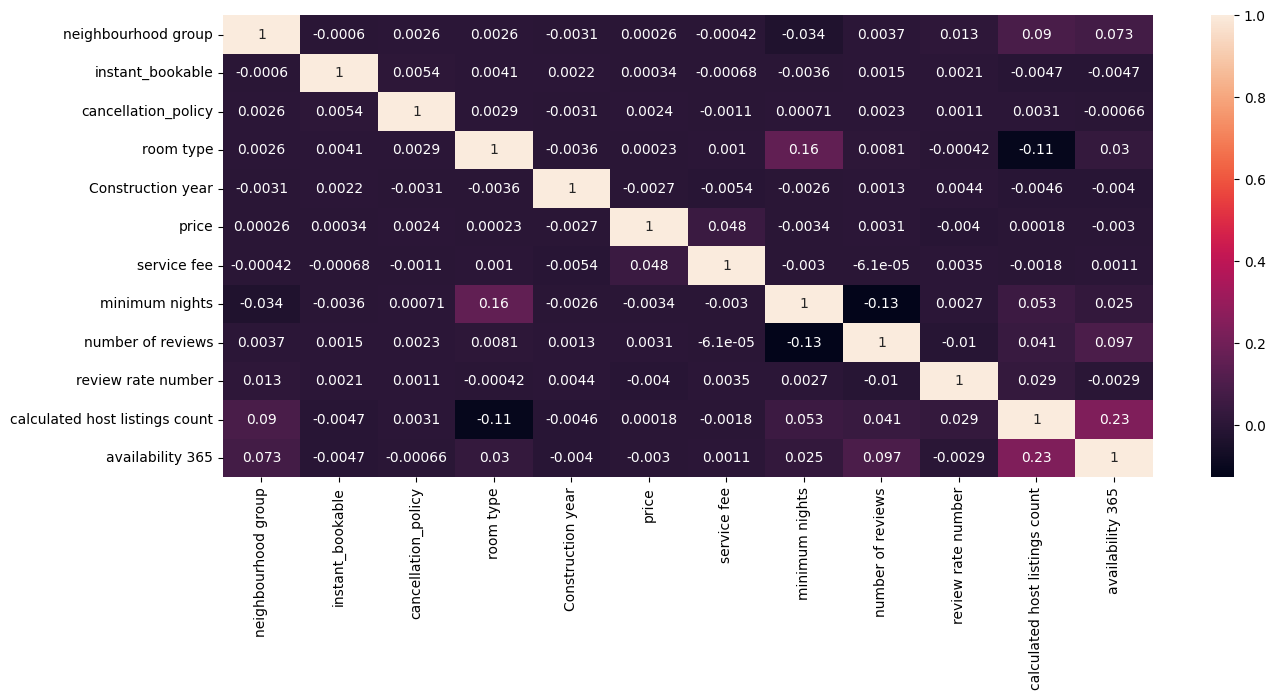

In [44]:
#Calculo las correlaciones entre diferentes variables
corr = df_airbnb_codificado.corr(method='kendall')
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True)
corr_variables  = df_airbnb_codificado.columns


**Correlación del precio con otras variables**

El gráfico de correlaciones muestra que el precio tiene una leve
 correlación positiva con las siguientes variables:

neighbourhood_group,instant_bookable, cancellation_policy, room type, service free y number of  reviews


Y el precio tiene una leve correlación negativa con las siguientes variables:

Construccion year, minimum_nights, review rate number y availability 365


###5.3 **Normalización de variables**

In [45]:
# Seleccione características para la agrupación (reemplace con sus características relevantes)
df_x = df_airbnb_codificado

# Defina un rango de valores de n_clusters a explorar
valores_n_clusters = range(2, 5)  # Ejemplo de rango de 2 a 4

# Almacene los resultados en una lista
resultados = []

for n_clusters in valores_n_clusters:
    # Inicialice y ajuste el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_x)

    # Obtenga las etiquetas de clúster y calcule el Coeficiente de silhouette
    etiquetas_cluster = kmeans.labels_
    silhouette_avg = silhouette_score(df_x, etiquetas_cluster)

    # Almacene los resultados para el valor actual de n_clusters
    resultados.append((n_clusters, silhouette_avg))

In [46]:
print(resultados)

[(2, 0.48016707554419), (3, 0.3655670940528417), (4, 0.3580809763519032)]


Coeficiente de silhouette:

Mide la cohesión interna de los clusters (qué tan similares son los puntos dentro de un cluster) y la separación entre clusters (qué tan separados están los clusters entre sí).
Valores cercanos a 1 indican que un punto está bien ubicado dentro de su cluster y lejos de otros clusters.
Valores cercanos a -1 indican que un punto está mal ubicado y podría pertenecer a otro cluster.
Valores cercanos a 0 indican que el punto está en el borde de un cluster o entre dos clusters.

In [47]:
# Selecciona el número de clusters óptimo
n_clusters_optimo = 2  #

# Crea una nueva columna en el DataFrame original para almacenar las etiquetas de cluster
df_x['cluster_kmeans'] = kmeans.labels_
print(df_x.columns)

Index(['neighbourhood group', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365', 'cluster_kmeans'],
      dtype='object')


In [48]:
# análisis segmentado por cluster
df_cluster_1 = df_x[df_x['cluster_kmeans'] == n_clusters_optimo]  #  análisis del cluster 1
print(df_cluster_1.describe())  # descripción estadística del cluster 1

       neighbourhood group  instant_bookable  cancellation_policy  \
count         31220.000000      31220.000000         31220.000000   
mean              1.043690          0.500865             1.005669   
std               1.307718          0.500007             0.815620   
min               0.000000          0.000000             0.000000   
25%               0.000000          0.000000             0.000000   
50%               1.000000          1.000000             1.000000   
75%               1.000000          1.000000             2.000000   
max               4.000000          1.000000             2.000000   

          room type  Construction year         price   service fee  \
count  31220.000000       31220.000000  31220.000000  31220.000000   
mean       0.574600        2012.455830   1020.424215    121.337508   
std        0.543424           5.769364    104.671176     65.590398   
min        0.000000        2003.000000    802.000000      0.000000   
25%        0.000000        2

In [49]:
# análisis segmentado por cluster
df_cluster_2 = df_x[df_x['cluster_kmeans'] >= n_clusters_optimo]  # análisis del cluster 2
print(df_cluster_2.describe())  # descripción estadística del cluster 2

       neighbourhood group  instant_bookable  cancellation_policy  \
count         53496.000000      53496.000000         53496.000000   
mean              1.007477          0.498131             1.001178   
std               1.280400          0.500001             0.815002   
min               0.000000          0.000000             0.000000   
25%               0.000000          0.000000             0.000000   
50%               1.000000          0.000000             1.000000   
75%               1.000000          1.000000             2.000000   
max               4.000000          1.000000             2.000000   

          room type  Construction year         price   service fee  \
count  53496.000000       53496.000000  53496.000000  53496.000000   
mean       0.562734        2012.474204    855.514487    117.590156   
std        0.541216           5.773570    224.852540     65.228842   
min        0.000000        2003.000000    405.000000      0.000000   
25%        0.000000        2

##**6. Entrenamiento**

Este código prepara los datos para entrenar un modelo de aprendizaje automático. Separa las variables que usará el modelo para predecir (independientes) de la variable que queremos predecir (dependiente) y luego divide los datos en dos conjuntos: uno para entrenar el modelo y otro para probar su rendimiento.



Se utilizaran dos conjuntos de variables

*   x_1/y_1

(df_cluster_1 = df_x[df_x['cluster_kmeans'] == n_clusters_optimo])

*   x_2/y_2

(df_cluster_2 = df_x[df_x['cluster_kmeans'] >= n_clusters_optimo])


###6.1 **variables x_1 / y_1**



In [50]:
x_1 = df_cluster_1.drop('price', axis=1)
y_1= df_cluster_1['price']

In [51]:
# Dividir el dataset en train y test
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.2, random_state=353)

In [52]:
# Seleccionar las mejores features
selector_1 = SelectKBest(f_regression, k=10)
selector_1.fit(x_1_train, y_1_train)

# Obtener las features seleccionadas y las modifico con x_1 = x_1.iloc[:,[0,1,3,8,9,10,11]] para volver a entrenar
selected_features_1 = x_1_train.columns[selector_1.get_support()]
print(selected_features_1)

Index(['neighbourhood group', 'instant_bookable', 'room type',
       'Construction year', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')


In [53]:
print(x_1.columns)

Index(['neighbourhood group', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365', 'cluster_kmeans'],
      dtype='object')


In [54]:
x_1 = x_1.iloc[:,[0,1,3,4,5,6,7,8,9,10]]

In [55]:
# Dividir el dataset en train y test
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.2, random_state=353)

###6.2 **variables x_2 / y_2**



In [56]:
x_2 = df_cluster_2.drop('price', axis=1)
y_2= df_cluster_2['price']

In [57]:
# Dividir el dataset en train y test
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=353)

In [58]:
# Seleccionar las mejores features
selector_2 = SelectKBest(f_regression, k=10)
selector_2.fit(x_2_train, y_2_train)

# Obtener las features seleccionadas y las modifico con x_1 = x_1.iloc[:,[0,1,3,8,9,10,11]] para volver a entrenar
selected_features_2 = x_2_train.columns[selector_2.get_support()]
print(selected_features_2)

Index(['neighbourhood group', 'cancellation_policy', 'room type',
       'service fee', 'minimum nights', 'number of reviews',
       'review rate number', 'calculated host listings count',
       'availability 365', 'cluster_kmeans'],
      dtype='object')


In [59]:
print(x_2.columns)

Index(['neighbourhood group', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365', 'cluster_kmeans'],
      dtype='object')


In [60]:
x_2 = x_2.iloc[:,[0,2,3,5,6,7,8,9,10,11]]

In [61]:
# Dividir el dataset en train y test
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=353)

##**7. Evaluación de modelos**

**Regresión**: predecir el precio (target) de una vivienda en AirBNB en función de sus características (feature)

###7.1 **variables x_1 / y_1**

In [62]:
models_1 = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
for name, model in models_1.items():
    model.fit(x_1_train, y_1_train)
resultados_1 = []
for name, model in models_1.items():
    y_1_pred = model.predict(x_1_test)

    # Cálculo del error cuadrático medio (MSE)
    mse_1 = mean_squared_error(y_1_test, y_1_pred)
    # Error cuadrático medio raíz (RMSE)
    rmse_1 = mse_1**0.5
    # calcula el coeficiente de determinación R^2 para evaluar el rendimiento del modelo
    r2_1 = r2_score(y_1_test, y_1_pred)

    resultados_1.append({'Model': name, 'MSE': mse_1, 'RMSE': rmse_1, 'R2': r2_1})

# Print resultados
df_resultados_1 = pd.DataFrame(resultados_1)
print('Resultados')
print(df_resultados_1)


Resultados
                 Model           MSE        RMSE        R2
0     Regresión Lineal  11103.752885  105.374346 -0.000729
1    Árbol de Decisión      2.250641    1.500214  0.999797
2  K-Nearest Neighbors   9205.737322   95.946534  0.170330
3        Random Forest      1.347558    1.160844  0.999879
4    Gradient Boosting   2221.502058   47.132813  0.799787


###7.2 **variables x_2 / y_2**

In [63]:
models_2 = {
    'Regresión Lineal_2': LinearRegression(),
    'Árbol de Decisión_2': DecisionTreeRegressor(),
    'K-Nearest Neighbors_2': KNeighborsRegressor(),
    'Random Forest_2': RandomForestRegressor(),
    'Gradient Boosting_2': GradientBoostingRegressor()
}
for name, model in models_2.items():
    model.fit(x_2_train, y_2_train)
resultados_2 = []
for name, model in models_2.items():
    y_2_pred = model.predict(x_2_test)

    # Cálculo del error cuadrático medio (MSE)
    mse_2 = mean_squared_error(y_2_test, y_2_pred)
    # Error cuadrático medio raíz (RMSE)
    rmse_2 = mse_2**0.5
    # calcula el coeficiente de determinación R^2 para evaluar el rendimiento del modelo
    r2_2 = r2_score(y_2_test, y_2_pred)

    resultados_2.append({'Model': name, 'MSE': mse_2, 'RMSE': rmse_2, 'R2': r2_2})

# Print resultados
df_resultados_2 = pd.DataFrame(resultados_2)
print('Resultados')
print(df_resultados_2)

Resultados
                   Model           MSE        RMSE        R2
0     Regresión Lineal_2  12578.977008  112.156039  0.750226
1    Árbol de Decisión_2      2.386238    1.544745  0.999953
2  K-Nearest Neighbors_2  29138.544669  170.700160  0.421412
3        Random Forest_2      1.410203    1.187520  0.999972
4    Gradient Boosting_2   5139.286766   71.688819  0.897952


###7.3 **Comparacion entre conjunto de variables**

####7.3.1 **Comparación MSE de modelos de regresión**

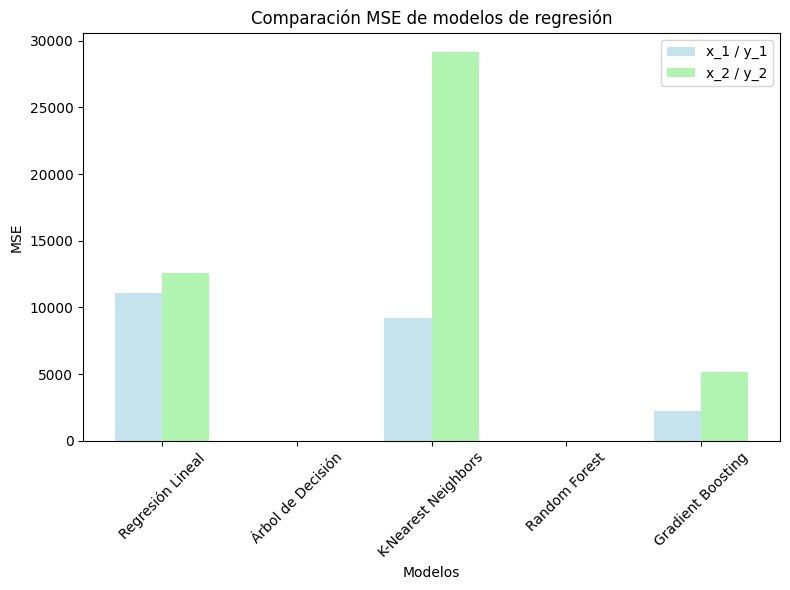

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))  # Ajusta el tamaño según tus preferencias
# Suponiendo que df_resultados_1 contiene las categorías 'Model' y valores 'MSE'
bar_width = 0.35  # Ancho de cada barra individual
index = range(len(df_resultados_1['Model']))  # Posiciones en el eje X para cada categoría

axes.bar(index, df_resultados_1['MSE'], bar_width, label='x_1 / y_1', color='lightblue', alpha=0.7)
axes.bar([i + bar_width for i in index], df_resultados_2['MSE'], bar_width, label='x_2 / y_2', color='lightgreen', alpha=0.7)
axes.set_xlabel('Modelos')
axes.set_ylabel('MSE')
axes.set_title('Comparación MSE de modelos de regresión')
axes.set_xticks([i + bar_width / 2 for i in index])  # Posiciones de las etiquetas del eje X
axes.set_xticklabels(df_resultados_1['Model'], rotation=45)  # Etiquetas del eje X
axes.legend()  # Muestra la leyenda con las etiquetas de cada barra
plt.tight_layout()
plt.show()

**Interpretación del MSE**:

Un valor de MSE bajo indica que el modelo predice los valores con mayor precisión, ya que las diferencias entre los valores predichos y reales son menores en promedio.
Un valor de MSE alto indica que el modelo predice los valores con menor precisión, ya que las diferencias entre los valores predichos y reales son mayores en promedio.

####7.3.2 **Comparación RMSE de modelos de regresión**

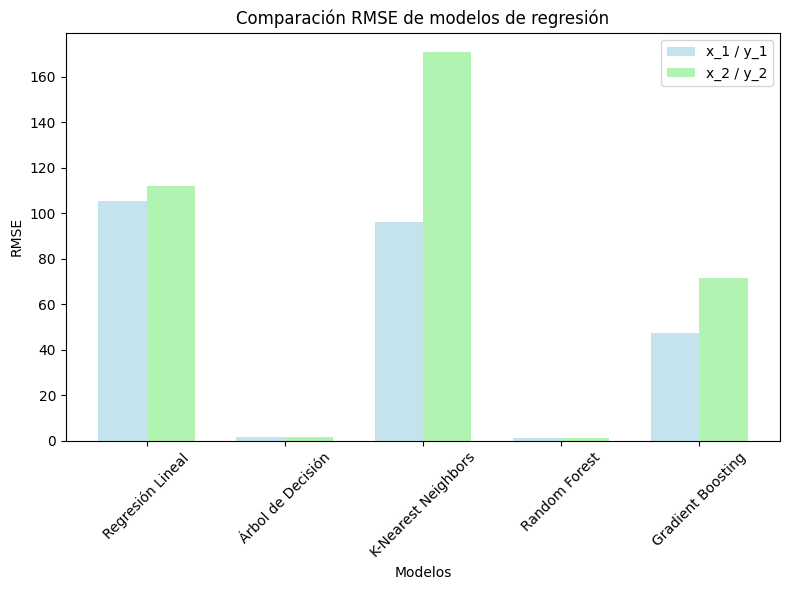

In [65]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))  # Ajusta el tamaño según tus preferencias
# Suponiendo que df_resultados_1 contiene las categorías 'Model' y valores 'RMSE'
bar_width = 0.35  # Ancho de cada barra individual
index = range(len(df_resultados_1['Model']))  # Posiciones en el eje X para cada categoría

axes.bar(index, df_resultados_1['RMSE'], bar_width, label='x_1 / y_1', color='lightblue', alpha=0.7)
axes.bar([i + bar_width for i in index], df_resultados_2['RMSE'], bar_width, label='x_2 / y_2', color='lightgreen', alpha=0.7)
axes.set_xlabel('Modelos')
axes.set_ylabel('RMSE')
axes.set_title('Comparación RMSE de modelos de regresión')
axes.set_xticks([i + bar_width / 2 for i in index])  # Posiciones de las etiquetas del eje X
axes.set_xticklabels(df_resultados_1['Model'], rotation=45)  # Etiquetas del eje X
axes.legend()  # Muestra la leyenda con las etiquetas de cada barra
plt.tight_layout()
plt.show()

**Interpretación del RMSE**:

El RMSE se expresa en las mismas unidades que la variable objetivo, lo que facilita la interpretación de la magnitud del error.
Un valor de RMSE bajo indica que el modelo predice los valores con mayor precisión, ya que las diferencias promedio entre los valores predichos y reales son menores.
Un valor de RMSE alto indica que el modelo predice los valores con menor precisión, ya que las diferencias promedio entre los valores predichos y reales son mayores.

####7.3.3 **Comparación R2 de modelos de regresión**

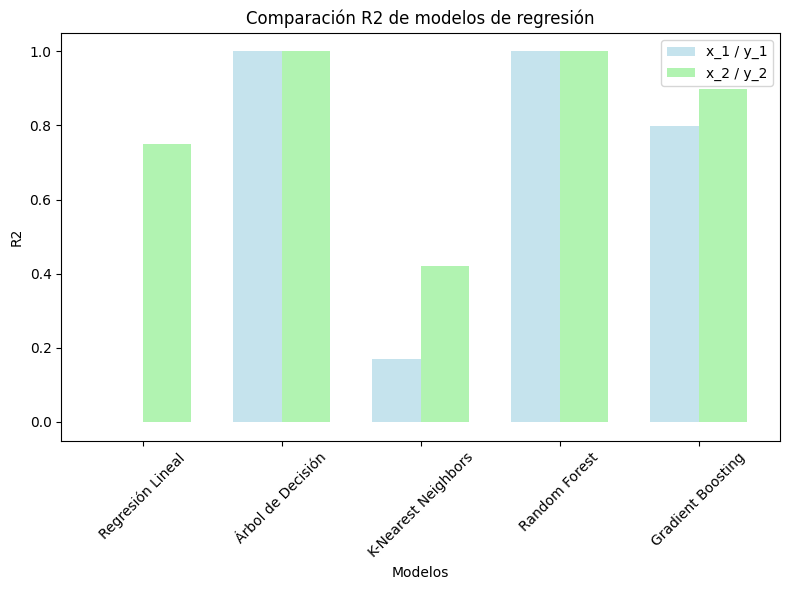

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))  # Ajusta el tamaño según tus preferencias
# Suponiendo que df_resultados_1 contiene las categorías 'Model' y valores 'R2'
bar_width = 0.35  # Ancho de cada barra individual
index = range(len(df_resultados_1['Model']))  # Posiciones en el eje X para cada categoría

axes.bar(index, df_resultados_1['R2'], bar_width, label='x_1 / y_1', color='lightblue', alpha=0.7)
axes.bar([i + bar_width for i in index], df_resultados_2['R2'], bar_width, label='x_2 / y_2', color='lightgreen', alpha=0.7)
axes.set_xlabel('Modelos')
axes.set_ylabel('R2')
axes.set_title('Comparación R2 de modelos de regresión')
axes.set_xticks([i + bar_width / 2 for i in index])  # Posiciones de las etiquetas del eje X
axes.set_xticklabels(df_resultados_1['Model'], rotation=45)  # Etiquetas del eje X
axes.legend()  # Muestra la leyenda con las etiquetas de cada barra
plt.tight_layout()
plt.show()

**Interpretación del R²**:

Un valor de R² mayor que 0.5 generalmente se considera una buena correlación entre las variables.
Un valor de R² cercano a 1 indica que el modelo explica casi toda la variabilidad de la variable objetivo.
Un valor de R² cercano a 0 indica que el modelo no explica bien la variabilidad de la variable objetivo y puede ser necesario ajustar el modelo o considerar otras variables.

##**8. Conclusiones**

Basándonos en los resultados proporcionados por las variables x_1 / y_1 (df_x['cluster_kmeans'] == n_clusters_optimo) y las variables x_2 / Y_2 (df_x['cluster_kmeans'] >= n_clusters_optimo), podemos extraer lo siguiente:
1. El modelo con el menor MSE y RMSE es el "Árbol de Decisión" tanto para x_1 / y_1 como para x_2 / Y_2.

Esto significa que estos modelos predicen los precios de Airbnb con la menor diferencia promedio respecto a los valores reales.
Su MSE y RMSE indican un alto nivel de precisión en las predicciones.
2. Los modelos con el mayor R² son el "Random Forest" y "Árbol de Decisión" tanto para x_1 / y_1 como para x_2 / Y_2 .

Un R² de 0.99 indica que estos modelos explican casi el 100% de la variabilidad en los precios de Airbnb.
Esto sugiere que ambos son capaces de capturar de manera efectiva los factores que influyen en el precio de las viviendas.
3. El modelo "Gradient Boosting" tiene un buen equilibrio entre MSE, RMSE y R² para ambos conjuntos de variables.

Su MSE y RMSE indican un rendimiento aceptable en términos de precisión de predicción.
Su R² mayor a 0.8 muestra que también tiene una buena capacidad para explicar la variabilidad en los precios.
4. Los modelos "Regresión Lineal" y "K-Nearest Neighbors" tienen un rendimiento inferior en comparación con los demás.

Su mayor MSE y RMSE indican que sus predicciones son menos precisas que las de los otros modelos.
El "K-Nearest Neighbors" tiene un R² relativamente bajo, lo que sugiere que no captura tan bien la relación entre las características y el precio.



###8.1 **Selección del mejor modelo**



En base a los resultados, el "Árbol de Decisión" y el "Random Forest"  se destacan como los modelos con el mejor rendimiento general, pero la evidencia del R² alto en el conjunto de prueba sugiere un posible sobreentrenamiento.El modelo "Gradient Boosting" tiene un buen equilibrio entre MSE, RMSE y R² para obtener un modelo más generalizable.

##**Anexo 1 utilizacion de Api**

In [67]:
#Librerias
import requests
import json
import pandas as pd

###**URL de la api sin clave**

In [68]:
url ="https://restcountries.com/v3.1/all"
respuesta = requests.get(url)
print(respuesta)

<Response [200]>


In [69]:
texto=respuesta.text
datos=json.loads(texto)

In [70]:
df=pd.DataFrame.from_dict(datos)
df

,name,tld,cca2,ccn3,cca3,independent,status,unMember,currencies,idd,...,flags,coatOfArms,startOfWeek,capitalInfo,cioc,subregion,fifa,borders,gini,postalCode
0,"{'common': 'South Georgia', 'official': 'South...",[.gs],GS,239,SGS,False,officially-assigned,False,"{'SHP': {'name': 'Saint Helena pound', 'symbol...","{'root': '+5', 'suffixes': ['00']}",...,"{'png': 'https://flagcdn.com/w320/gs.png', 'sv...",{},monday,"{'latlng': [-54.28, -36.5]}",NaN,NaN,NaN,NaN,NaN,NaN
1,"{'common': 'Grenada', 'official': 'Grenada', '...",[.gd],GD,308,GRD,True,officially-assigned,True,"{'XCD': {'name': 'Eastern Caribbean dollar', '...","{'root': '+1', 'suffixes': ['473']}",...,"{'png': 'https://flagcdn.com/w320/gd.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [32.38, -64.68]}",GRN,Caribbean,GRN,NaN,NaN,NaN
2,"{'common': 'Switzerland', 'official': 'Swiss C...",[.ch],CH,756,CHE,True,officially-assigned,True,"{'CHF': {'name': 'Swiss franc', 'symbol': 'Fr.'}}","{'root': '+4', 'suffixes': ['1']}",...,"{'png': 'https://flagcdn.com/w320/ch.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [46.92, 7.47]}",SUI,Western Europe,SUI,"[AUT, FRA, ITA, LIE, DEU]",{'2018': 33.1},"{'format': '####', 'regex': '^(\d{4})$'}"
3,"{'common': 'Sierra Leone', 'official': 'Republ...",[.sl],SL,694,SLE,True,officially-assigned,True,"{'SLL': {'name': 'Sierra Leonean leone', 'symb...","{'root': '+2', 'suffixes': ['32']}",...,"{'png': 'https://flagcdn.com/w320/sl.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [8.48, -13.23]}",SLE,Western Africa,SLE,"[GIN, LBR]",{'2018': 35.7},NaN
4,"{'common': 'Hungary', 'official': 'Hungary', '...",[.hu],HU,348,HUN,True,officially-assigned,True,"{'HUF': {'name': 'Hungarian forint', 'symbol':...","{'root': '+3', 'suffixes': ['6']}",...,"{'png': 'https://flagcdn.com/w320/hu.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [47.5, 19.08]}",HUN,Central Europe,HUN,"[AUT, HRV, ROU, SRB, SVK, SVN, UKR]",{'2018': 29.6},"{'format': '####', 'regex': '^(\d{4})$'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"{'common': 'Belgium', 'official': 'Kingdom of ...",[.be],BE,056,BEL,True,officially-assigned,True,"{'EUR': {'name': 'Euro', 'symbol': '€'}}","{'root': '+3', 'suffixes': ['2']}",...,"{'png': 'https://flagcdn.com/w320/be.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [50.83, 4.33]}",BEL,Western Europe,BEL,"[FRA, DEU, LUX, NLD]",{'2018': 27.2},"{'format': '####', 'regex': '^(\d{4})$'}"
246,"{'common': 'Israel', 'official': 'State of Isr...",[.il],IL,376,ISR,True,officially-assigned,True,"{'ILS': {'name': 'Israeli new shekel', 'symbol...","{'root': '+9', 'suffixes': ['72']}",...,"{'png': 'https://flagcdn.com/w320/il.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,sunday,"{'latlng': [31.77, 35.23]}",ISR,Western Asia,ISR,"[EGY, JOR, LBN, PSE, SYR]",{'2016': 39.0},"{'format': '#####', 'regex': '^(\d{5})$'}"
247,"{'common': 'New Zealand', 'official': 'New Zea...",[.nz],NZ,554,NZL,True,officially-assigned,True,"{'NZD': {'name': 'New Zealand dollar', 'symbol...","{'root': '+6', 'suffixes': ['4']}",...,"{'png': 'https://flagcdn.com/w320/nz.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [-41.3, 174.78]}",NZL,Australia and New Zealand,NZL,NaN,NaN,"{'format': '####', 'regex': '^(\d{4})$'}"
248,"{'common': 'Nicaragua', 'official': 'Republic ...",[.ni],NI,558,NIC,True,officially-assigned,True,"{'NIO': {'name': 'Nicaraguan córdoba', 'symbol...","{'root': '+5', 'suffixes': ['05']}",...,"{'png': 'https://flagcdn.com/w320/ni.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [12.13, -86.25]}",NCA,Central America,NCA,"[CRI, HND]",{'2014': 46.2},"{'format': '###-###-#', 'regex': '^(\d{7})$'}"


In [71]:
df.shape

(250, 35)

In [72]:
df.columns

Index(['name', 'tld', 'cca2', 'ccn3', 'cca3', 'independent', 'status',
       'unMember', 'currencies', 'idd', 'capital', 'altSpellings', 'region',
       'languages', 'translations', 'latlng', 'landlocked', 'area', 'demonyms',
       'flag', 'maps', 'population', 'car', 'timezones', 'continents', 'flags',
       'coatOfArms', 'startOfWeek', 'capitalInfo', 'cioc', 'subregion', 'fifa',
       'borders', 'gini', 'postalCode'],
      dtype='object')

In [73]:
df.isnull().sum()

,0
name,0
tld,1
cca2,0
ccn3,1
cca3,0
independent,1
status,0
unMember,0
currencies,3
idd,0


In [74]:
df.head()

,name,tld,cca2,ccn3,cca3,independent,status,unMember,currencies,idd,...,flags,coatOfArms,startOfWeek,capitalInfo,cioc,subregion,fifa,borders,gini,postalCode
0,"{'common': 'South Georgia', 'official': 'South...",[.gs],GS,239,SGS,False,officially-assigned,False,"{'SHP': {'name': 'Saint Helena pound', 'symbol...","{'root': '+5', 'suffixes': ['00']}",...,"{'png': 'https://flagcdn.com/w320/gs.png', 'sv...",{},monday,"{'latlng': [-54.28, -36.5]}",NaN,NaN,NaN,NaN,NaN,NaN
1,"{'common': 'Grenada', 'official': 'Grenada', '...",[.gd],GD,308,GRD,True,officially-assigned,True,"{'XCD': {'name': 'Eastern Caribbean dollar', '...","{'root': '+1', 'suffixes': ['473']}",...,"{'png': 'https://flagcdn.com/w320/gd.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [32.38, -64.68]}",GRN,Caribbean,GRN,NaN,NaN,NaN
2,"{'common': 'Switzerland', 'official': 'Swiss C...",[.ch],CH,756,CHE,True,officially-assigned,True,"{'CHF': {'name': 'Swiss franc', 'symbol': 'Fr.'}}","{'root': '+4', 'suffixes': ['1']}",...,"{'png': 'https://flagcdn.com/w320/ch.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [46.92, 7.47]}",SUI,Western Europe,SUI,"[AUT, FRA, ITA, LIE, DEU]",{'2018': 33.1},"{'format': '####', 'regex': '^(\d{4})$'}"
3,"{'common': 'Sierra Leone', 'official': 'Republ...",[.sl],SL,694,SLE,True,officially-assigned,True,"{'SLL': {'name': 'Sierra Leonean leone', 'symb...","{'root': '+2', 'suffixes': ['32']}",...,"{'png': 'https://flagcdn.com/w320/sl.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [8.48, -13.23]}",SLE,Western Africa,SLE,"[GIN, LBR]",{'2018': 35.7},NaN
4,"{'common': 'Hungary', 'official': 'Hungary', '...",[.hu],HU,348,HUN,True,officially-assigned,True,"{'HUF': {'name': 'Hungarian forint', 'symbol':...","{'root': '+3', 'suffixes': ['6']}",...,"{'png': 'https://flagcdn.com/w320/hu.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [47.5, 19.08]}",HUN,Central Europe,HUN,"[AUT, HRV, ROU, SRB, SVK, SVN, UKR]",{'2018': 29.6},"{'format': '####', 'regex': '^(\d{4})$'}"


###**URL de la api con clave**

In [75]:
url_2 ="http://api.openweathermap.org/data/2.5/weather?q=Buenos Aires,ar&APPID=c8529515ff69189e5047183eb7add47b"
respuesta_2 = requests.get(url_2)
print(respuesta_2)

<Response [200]>


In [76]:
data=respuesta_2.text
data_2=json.loads(data)
data_2

{'coord': {'lon': -58.3772, 'lat': -34.6132},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 290.37,
  'feels_like': 289.09,
  'temp_min': 290,
  'temp_max': 291.45,
  'pressure': 1019,
  'humidity': 36,
  'sea_level': 1019,
  'grnd_level': 1018},
 'visibility': 10000,
 'wind': {'speed': 10.73, 'deg': 203, 'gust': 15.65},
 'clouds': {'all': 0},
 'dt': 1723573521,
 'sys': {'type': 2,
  'id': 2092396,
  'country': 'AR',
  'sunrise': 1723545315,
  'sunset': 1723584092},
 'timezone': -10800,
 'id': 3435910,
 'name': 'Buenos Aires',
 'cod': 200}

In [77]:
# Aplanar los diccionarios anidados
datos_planos  = {}
for key, value in data_2.items():
  if isinstance(value, dict):
    for k, v in value.items():
      datos_planos[f"{key}_{k}"] = v
  else:
    datos_planos[key] = value

#Crear el dataframe
df_2 = pd.DataFrame(datos_planos, index=[0])

In [78]:
df_2

,coord_lon,coord_lat,weather,base,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,...,dt,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
0,-58.3772,-34.6132,"{'id': 800, 'main': 'Clear', 'description': 'c...",stations,290.37,289.09,290,291.45,1019,36,...,1723573521,2,2092396,AR,1723545315,1723584092,-10800,3435910,Buenos Aires,200


In [79]:
df_2.shape

(1, 27)

In [80]:
df_2.columns

Index(['coord_lon', 'coord_lat', 'weather', 'base', 'main_temp',
       'main_feels_like', 'main_temp_min', 'main_temp_max', 'main_pressure',
       'main_humidity', 'main_sea_level', 'main_grnd_level', 'visibility',
       'wind_speed', 'wind_deg', 'wind_gust', 'clouds_all', 'dt', 'sys_type',
       'sys_id', 'sys_country', 'sys_sunrise', 'sys_sunset', 'timezone', 'id',
       'name', 'cod'],
      dtype='object')

In [81]:
df_2.isnull().sum()

,0
coord_lon,0
coord_lat,0
weather,0
base,0
main_temp,0
main_feels_like,0
main_temp_min,0
main_temp_max,0
main_pressure,0
main_humidity,0


In [82]:
df_2.head()

,coord_lon,coord_lat,weather,base,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,...,dt,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
0,-58.3772,-34.6132,"{'id': 800, 'main': 'Clear', 'description': 'c...",stations,290.37,289.09,290,291.45,1019,36,...,1723573521,2,2092396,AR,1723545315,1723584092,-10800,3435910,Buenos Aires,200
